In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('../data/ntsb/cleaned/master_train.csv')

### Notes

The number of people onboard can be calculated from the injury totals. Note that this is not the same as `inj_tot_total`, which also includes people injured on the ground. Given the low frequency of ground injuries, I think we should focus on onboard injuries / injury proportion

__Caveat__: In multi-plane crashes, the onboard injury counts are aggregated. Need to go back into the .mdb to get the data by plane, not by event

In [97]:
data['num_people_onboard'] = data['inj_tot_f'] + data['inj_tot_m'] + data['inj_tot_n'] + data['inj_tot_s']
data['prop_onboard_inj'] =  (data['num_people_onboard'] - data['inj_tot_n'])/ data['num_people_onboard']
data['prop_onboard_inj_m'] =  data['inj_tot_m'] / data['num_people_onboard']
data['prop_onboard_inj_s'] =  data['inj_tot_s'] / data['num_people_onboard']
data['prop_onboard_inj_f'] =  data['inj_tot_f'] / data['num_people_onboard']

# Imputing `total_seats`

In [98]:
len(data)

16541

In [ ]:
data_seats_unknown = data.loc[data['total_seats'].isna()]
data_seats_known = data.loc[~data['total_seats'].isna()]

In [100]:
data.loc[data['acft_make'].isna(), 'acft_make'] = 'unknown'

In [105]:
makes = data['acft_make'].unique()

seats_unknown_prop = {}

for make in makes:
    data_of_make = data.loc[data['acft_make'] == make]

    num_of_make = len(data_of_make)
    num_unknown_of_make = data_of_make['total_seats'].isna().sum()

    seats_unknown_prop[make] = num_unknown_of_make / num_of_make

In [108]:
for key in seats_unknown_prop.keys():
    if seats_unknown_prop[key] > 0.5:
        print(f'{key}: {seats_unknown_prop[key]}')

unknown: 0.9995100440960314
AIRBUS: 0.5233644859813084
THE BOEING COMPANY: 1.0
Mcdonnell Douglas: 0.6666666666666666
Piper Aircraft Corporation: 0.6666666666666666
EDWARD M VAN MORLAN: 1.0
PIPER AIRCRAFT CORPORATION: 0.6666666666666666
Airbus: 0.6470588235294118
SCODA AERONAUTICAL: 1.0
Boeing: 0.6382978723404256
Eberle: 1.0
Beech Aircraft Corp: 1.0
Ison Aircraft: 1.0
Burkhart Grob: 1.0
SACCIO THOMAS A: 1.0
MICKLER LARRY J: 1.0
Koleno: 1.0
Bede: 1.0
Terrell Caragol: 1.0
Britten Norman: 1.0
GIACKINO DONALD W: 1.0
SCALED COMPOSITES: 1.0
Evolution Trikes: 1.0
AIRPARTS NZ LTD: 1.0
NORMAN: 1.0
CESSNA AIRCRAFT COMPANY: 0.8
AMATEUR BUILT AIRCRAFT: 1.0
Elkins: 1.0
Howell: 1.0
LEARJET: 0.6
Agusta: 0.75
BELL HELICOPTER CO: 1.0
HEAD BALLOONS INC.: 1.0
SAAB: 0.6
Ultramagic: 1.0
REBERRY BRIAN: 1.0
Grumman Acft Eng : 1.0
HAWKER BEECH: 1.0
Evens: 1.0
TEMPLE BENJAMIN: 1.0
PIPER AIRCRAFT: 1.0
Aeros LTD: 1.0
INDY AIRCRAFT LTD: 1.0
BOEING COMPANY: 0.8333333333333334
Curtiss-Wright: 1.0
Newbold: 1.0
Ayres 

(array([  8., 107.,   7., 294.,   9.,  53.,   8.,   4.,   1.,  12.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

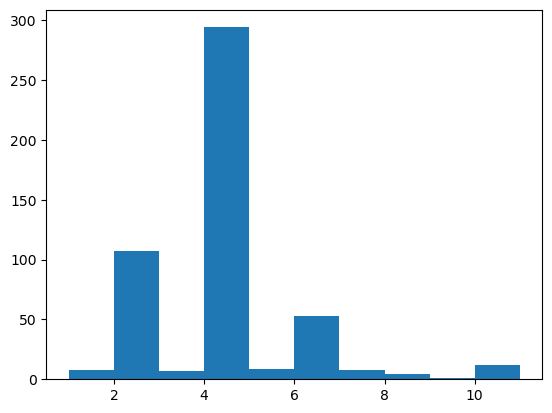

In [35]:
plt.hist(cessna['total_seats'])

# Exploration

I'm trying to figure out how to combine the four categories of injury (none, minor, serious, fatal) into a single metric of crash severity in a reasonable way.

### Observations 
- In > 80% of fatal crashes, everyone onboard died

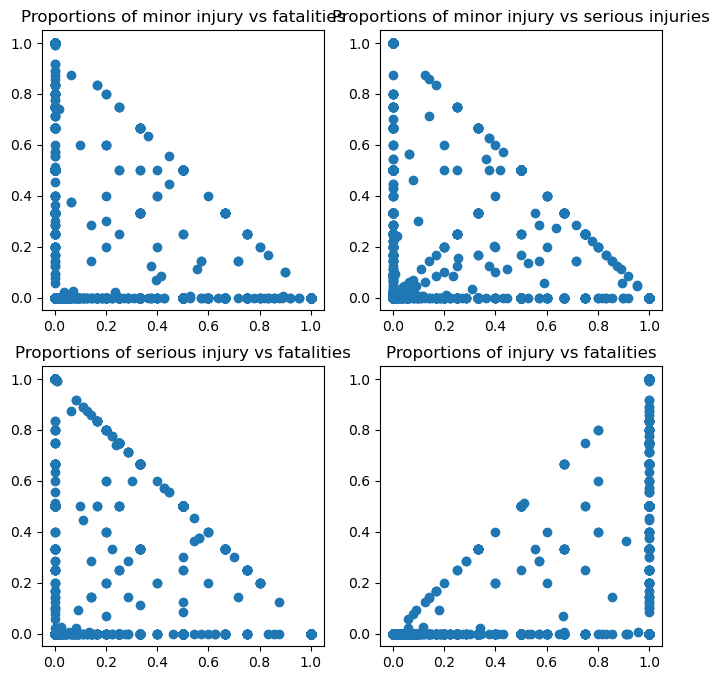

In [7]:
fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].scatter(data.prop_onboard_inj_m, data.prop_onboard_inj_f)
ax[0,0].set_title('Proportions of minor injury vs fatalities')

ax[0,1].scatter(data.prop_onboard_inj_m, data.prop_onboard_inj_s)
ax[0,1].set_title('Proportions of minor injury vs serious injuries')

ax[1,0].scatter(data.prop_onboard_inj_s, data.prop_onboard_inj_f)
ax[1,0].set_title('Proportions of serious injury vs fatalities')

ax[1,1].scatter(data.prop_onboard_inj, data.prop_onboard_inj_f)
ax[1,1].set_title('Proportions of injury vs fatalities')

plt.show()

In [8]:
data_f = data.loc[data['inj_tot_f'] > 0]
data_s = data.loc[data['ev_highest_injury'] == "SERS"]

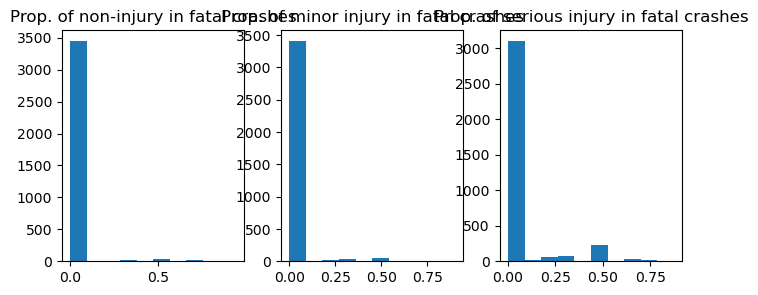

In [9]:
fig, ax = plt.subplots(1,3,figsize=(8,3))

ax[0].hist(1-data_f['prop_onboard_inj'])
ax[0].set_title('Prop. of non-injury in fatal crashes')

ax[1].hist(data_f['prop_onboard_inj_m'])
ax[1].set_title('Prop. of minor injury in fatal crashes')

ax[2].hist(data_f['prop_onboard_inj_s'])
ax[2].set_title('Prop. of serious injury in fatal crashes')

plt.show()

In [10]:
feat = ['prop_onboard_inj_m','prop_onboard_inj_s','prop_onboard_inj_f']
data[feat].corr()

,prop_onboard_inj_m,prop_onboard_inj_s,prop_onboard_inj_f
prop_onboard_inj_m,1.000000,-0.086850,-0.206475
prop_onboard_inj_s,-0.086850,1.000000,-0.126398
prop_onboard_inj_f,-0.206475,-0.126398,1.000000


In [11]:
len(data_f)

3545

In [12]:
data_f.prop_onboard_inj_f.value_counts()

prop_onboard_inj_f
1.000000    2924
0.500000     306
0.333333      83
0.666667      61
0.750000      30
0.250000      27
0.200000      15
0.800000      15
0.400000       9
0.833333       8
0.142857       6
0.600000       5
0.166667       4
0.714286       4
0.285714       4
0.555556       3
0.125000       3
0.777778       2
0.875000       2
0.571429       2
0.300000       2
0.888889       2
0.100000       2
0.916667       2
0.375000       2
0.090909       2
0.363636       1
0.058824       1
0.444444       1
0.857143       1
0.021277       1
0.083333       1
0.741379       1
0.022388       1
0.140187       1
0.991150       1
0.636364       1
0.512500       1
0.007874       1
0.023810       1
0.067164       1
0.111111       1
0.007143       1
0.454545       1
0.990385       1
0.076923       1
Name: count, dtype: int64